In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'D:\Machine Learning\Interface Project\project 2 Loan Status\Loan Status.csv')

# Details on Dataset

    
    
    - Loan_ID : Unique Loan ID

    - Gender : Male/ Female

    - Married : Applicant married (Y/N)

    - Dependents : Number of dependents

    - Education : Applicant Education (Graduate/ Under Graduate)

    - Self_Employed : Self employed (Y/N)

    - ApplicantIncome : Applicant income

    - CoapplicantIncome : Coapplicant income

    - LoanAmount : Loan amount in thousands of dollars

    - Loan_Amount_Term : Term of loan in months

    - Credit_History : Credit history meets guidelines yes or no

    - Property_Area : Urban/ Semi Urban/ Rural

    - Loan_Status : Loan approved (Y/N) this is the target variable

# 1. Display First 5 Rows of The Dataset

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 2. Check Last 5 Rows of The Dataset

In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
data.shape

(614, 13)

In [6]:
print("Number of Rows :",data.shape[0])
print("Number of columns :",data.shape[1])

Number of Rows : 614
Number of columns : 13


# 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# 5. Check Null Values In The Dataset

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data.isnull().sum()*100/len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# 6. Handling The missing Values

In [10]:
data = data.drop('Loan_ID', axis=1)

In [11]:
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [12]:
data = data.dropna(subset=columns)

In [13]:
data.isnull().sum()*100/len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [14]:
data['Self_Employed'].mode()[0]

'No'

In [15]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [17]:
data.isnull().sum()*100/len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [18]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [19]:
data['Credit_History'].mode()[0]

1.0

In [20]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [21]:
data.isnull().sum()*100/len(data)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

# 7. Get Overall Statistics About The Dataset
    
    A- Numarical Data

In [22]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,553.000000,553.000000,553.000000,553.000000,553.000000
mean,5350.018083,1659.119204,146.001808,341.663653,0.871609
std,5965.429068,3043.448229,84.052035,65.555451,0.334827
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2889.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1213.000000,128.000000,360.000000,1.000000
75%,5815.000000,2306.000000,170.000000,360.000000,1.000000
max,81000.000000,41667.000000,650.000000,480.000000,1.000000


# Get Overall Statistics About The Dataset    
    
    B- Catogrical Data

In [23]:
data.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,553,553,553,553,553,553,553
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,449,359,316,437,481,215,389


# 8. Handling Categorical Columns

In [24]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
419,Male,Yes,0,Graduate,No,3246,1417.0,138.0,360.0,1.0,Semiurban,Y
83,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,1.0,Semiurban,N
173,Male,Yes,0,Graduate,No,5708,5625.0,187.0,360.0,1.0,Semiurban,Y
140,Male,Yes,2,Graduate,No,5042,2083.0,185.0,360.0,1.0,Rural,N
68,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y


In [25]:
data['Dependents'] = data['Dependents'].replace(to_replace="3+", value='4')

In [26]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype(int)
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype(int)
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype(int)
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype(int)
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Urban':1,'Semiurban':2})
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype(int)

In [27]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


# 9. Draw Correlation Matrix 

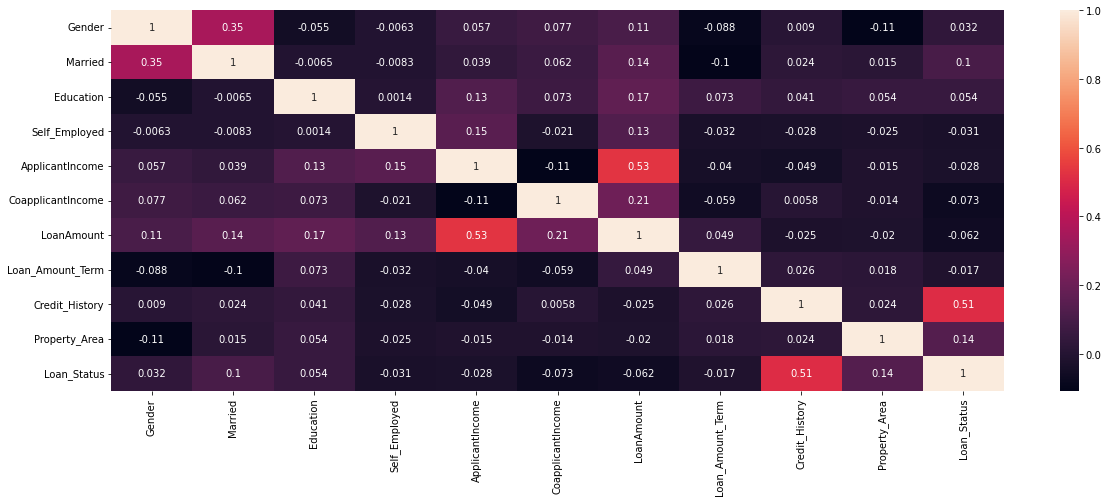

In [28]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True)

plt.show()

# 10. How Many People Have Loan Approved, And How Many Don't Have Loan Approved In This Dataset?

In [29]:
data['Loan_Status'].value_counts()

1    389
0    164
Name: Loan_Status, dtype: int64

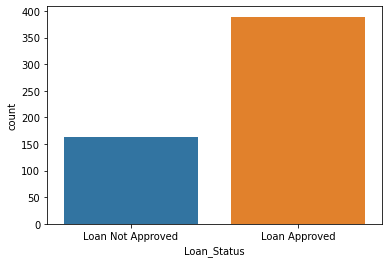

In [30]:
sns.countplot(x = data['Loan_Status'])
plt.xticks([0,1],['Loan Not Approved','Loan Approved'])

plt.show()

# 11. Find Count of  Male & Female in this Dataset

In [31]:
data['Gender'].value_counts()

1    449
0    104
Name: Gender, dtype: int64

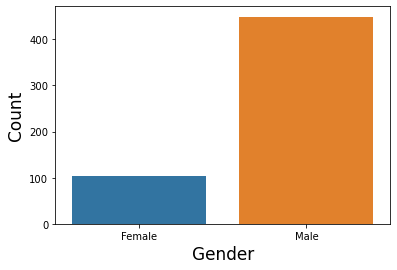

In [32]:
sns.countplot(x = data['Gender'])
plt.xticks([0,1],['Female','Male'])
plt.xlabel('Gender',fontsize=17)
plt.ylabel('Count',fontsize=17)

plt.show()

# 12. Find Gender Distribution According to The Loan Status Variable

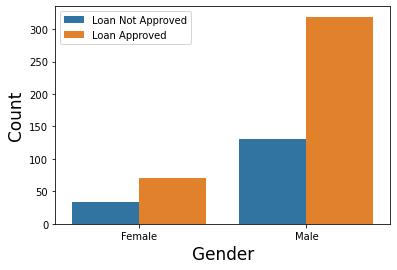

In [33]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['Loan Not Approved','Loan Approved'])
plt.xlabel('Gender',fontsize=17)
plt.ylabel('Count',fontsize=17)

plt.show()

# 13. Find Count of Married & Not Married in this Dataset

In [34]:
data['Married'].value_counts()

1    359
0    194
Name: Married, dtype: int64

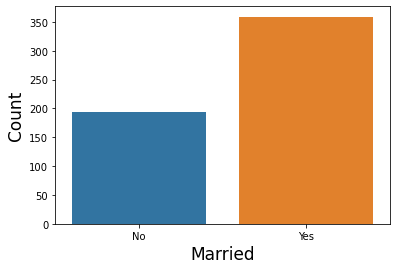

In [35]:
sns.countplot(x = data['Married'])
plt.xticks([0,1],['No','Yes'])
plt.xlabel('Married',fontsize=17)
plt.ylabel('Count',fontsize=17)

plt.show()

# 14. Find Married Distribution According to The Loan Status Variable

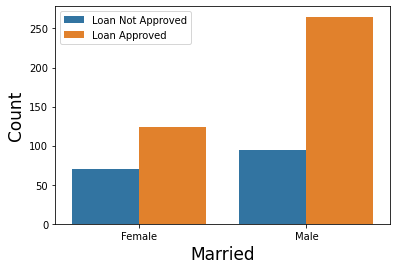

In [36]:
sns.countplot(x='Married',hue='Loan_Status',data=data)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['Loan Not Approved','Loan Approved'])
plt.xlabel('Married',fontsize=17)
plt.ylabel('Count',fontsize=17)

plt.show()

# 15. Check Applicant Income Distribution In The Dataset


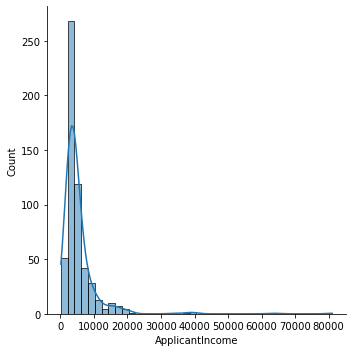

In [37]:
sns.displot(data['ApplicantIncome'],bins=40,kde=True)

plt.show()

# 16. Check Dependents Type


In [38]:
data['Dependents'].value_counts()

0    316
1     96
2     96
4     45
Name: Dependents, dtype: int64

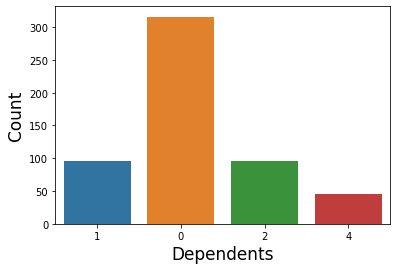

In [39]:
sns.countplot(x = data['Dependents'])
plt.xlabel('Dependents',fontsize=17)
plt.ylabel('Count',fontsize=17)

plt.show()

# 17. Show The Dependents Distribution As Per Loan Status Variable


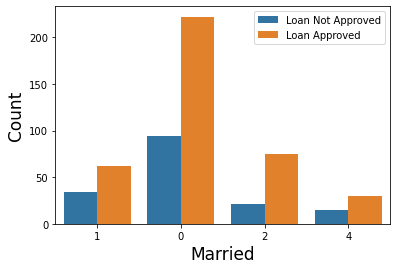

In [40]:
sns.countplot(x='Dependents',hue='Loan_Status',data=data)
plt.legend(labels=['Loan Not Approved','Loan Approved'])
plt.xlabel('Married',fontsize=17)
plt.ylabel('Count',fontsize=17)

plt.show()

# 18. Check Coapplicant Income Distribution In The Dataset

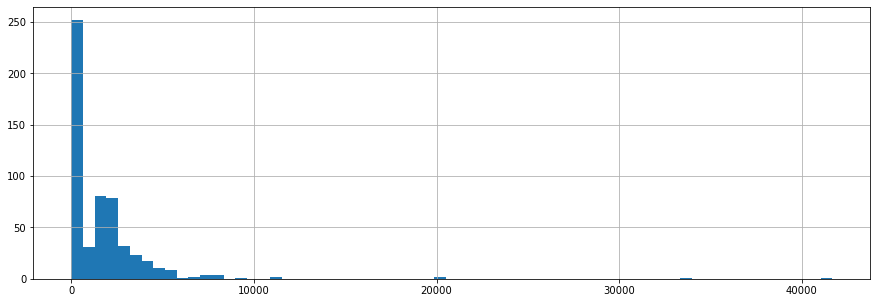

In [41]:
data['CoapplicantIncome'].hist(bins=65,figsize=(15,5))

plt.show()

# 19.  Applicant Income As Per Gender Column


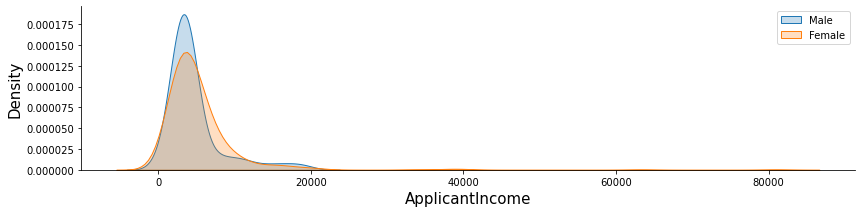

In [42]:
g = sns.FacetGrid(data,hue='Gender',aspect=4)
g.map(sns.kdeplot,'ApplicantIncome',shade=True)
plt.legend(labels=['Male','Female'])
plt.xlabel('ApplicantIncome',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.show()

# 20. Plot Continuous Variables


In [43]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [44]:
cate_val = []
cont_val = []
for column in data.columns :
    if data[column].nunique() <=10:
        cate_val.append(column)
    else :
        cont_val.append(column)

In [45]:
cate_val

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [46]:
cont_val

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

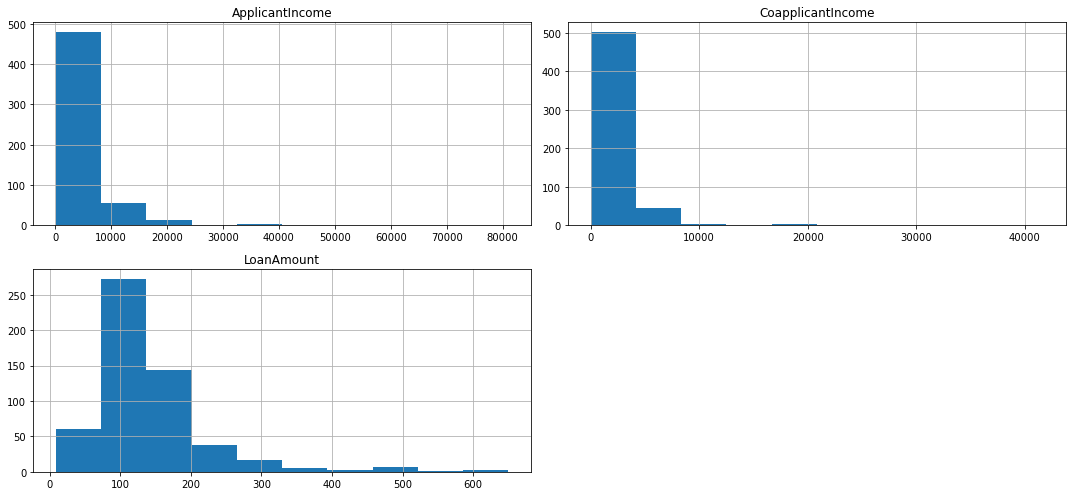

In [47]:
data.hist(cont_val,figsize=(15,7))
plt.tight_layout()
plt.show()

# 21. Store Feature Matrix In X And Response (Target) In Vector y

In [48]:
X = data.drop('Loan_Status',axis=1)

In [49]:
y = data['Loan_Status']

In [50]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

# 22. Feature Scaling

In [51]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [52]:
col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmount', 'Loan_Amount_Term']

In [53]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[col] = st.fit_transform(X[col])

In [54]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


# 23. Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [56]:
model_df={}
def model_val(model,X,y):

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model,'accuracy is',accuracy_score(y_test, y_pred))
    
    score = cross_val_score(model,X,y,cv=5)
    print(model,'Avg cross val score is',np.mean(score))
    
    model_df[model] = round(np.mean(score)*100,2)

# 24. Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8047829647829647


In [58]:
model_df

{LogisticRegression(): 80.48}

# 25. SVC

In [59]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.7927927927927928
SVC() Avg cross val score is 0.7938902538902539


# 26. Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.7387387387387387
DecisionTreeClassifier() Avg cross val score is 0.717968877968878


# 27. Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.7477477477477478
RandomForestClassifier() Avg cross val score is 0.7902866502866503


# 28. Gradient Boosting Classifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.7927927927927928
GradientBoostingClassifier() Avg cross val score is 0.774004914004914


# 29. Hyperparameter Tuning

In [63]:
from sklearn.model_selection import RandomizedSearchCV

# Logistic Regression

In [64]:
log_reg_grid = {"C":np.logspace(-4,4,20), 
               "solver":["liblinear"]}

In [65]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, n_iter=20, cv=5, verbose=True)

In [66]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [67]:
rs_log_reg.best_score_

0.8047829647829647

In [68]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

# SVC

In [69]:
svc_gris = {'C':np.logspace(0.25,1,20), 'kernel':['linear']}

In [70]:
rs_svc = RandomizedSearchCV(svm.SVC(), param_distributions=svc_gris, cv=5, n_iter=20, verbose=True)

In [71]:
rs_svc.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': array([ 1.77827941,  1.94748304,  2.13278643,  2.33572147,  2.55796582,
        2.80135676,  3.0679064 ,  3.35981829,  3.67950565,  4.02961132,
        4.41302962,  4.83293024,  5.29278449,  5.79639395,  6.34792196,
        6.95192796,  7.61340525,  8.33782223,  9.13116763, 10.        ]),
                                        'kernel': ['linear']},
                   verbose=True)

In [72]:
rs_svc.best_score_

0.8066011466011467

In [73]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 1.7782794100389228}

# Random Forest Classifier


In [74]:
rf_grid = {'n_estimators':np.arange(10,100,10),
'max_features':['auto','sqrt'],
'max_depth':[None,3,5,10,20,30],
'min_samples_split':[2,5,20,50,100],
'min_samples_leaf':[1,2,5,10]}

In [75]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

In [76]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [77]:
rs_rf.best_score_

0.8066175266175266

In [78]:
rs_rf.best_params_

{'n_estimators': 70,
 'min_samples_split': 50,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5}

# Compare beteen Before AND After HyperParameter

    - LogisticRegression score Before Hyperparameter Tuning: 80.48
    - LogisticRegression score after Hyperparameter Tuning: 80.48 
    
------------------------------------------------------
    - SVC score Before Hyperparameter Tuning: 79.38
    - SVC score after Hyperparameter Tuning: 80.66
    
--------------------------------------------------------
    - RandomForestClassifier score Before Hyperparameter Tuning: 77.76
    - RandomForestClassifier score after Hyperparameter Tuning: 80.66 

# 30. Save The Model

In [79]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [80]:
rf = RandomForestClassifier(n_estimators=10,
 min_samples_split= 100,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 5)

In [81]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=100,
                       n_estimators=10)

In [82]:
import joblib

In [83]:
joblib.dump(rf,'loan_status_predict')

['loan_status_predict']

In [84]:
model = joblib.load('loan_status_predict')

In [85]:
import pandas as pd
df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [86]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,2889,0.0,45,180,0,1


In [87]:
result = model.predict(df)

In [88]:
if result == 1:
    print('Loan Approved')
else:
    print('Loan Not Approved')

Loan Not Approved


In [89]:
from tkinter import *
import joblib
import pandas as pd

In [90]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    
    model = joblib.load('loan_status_predict')
    df = pd.DataFrame({
    'Gender':p1,
    'Married':p2,
    'Dependents':p3,
    'Education':p4,
    'Self_Employed':p5,
    'ApplicantIncome':p6,
    'CoapplicantIncome':p7,
    'LoanAmount':p8,
    'Loan_Amount_Term':p9,
    'Credit_History':p10,
    'Property_Area':p11
},index=[0])
    result = model.predict(df)
    
    if result == 1:
        Label(master, text="Loan approved").grid(row=31)
    else:
        Label(master, text="Loan Not Approved").grid(row=31)
        
        
        

        
        
master =Tk()
master.title("Loan Status Prediction Using Machine Learning")
label = Label(master,text = "Loan Status Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Gender [1:Male ,0:Female]").grid(row=1)
Label(master,text = "Married [1:Yes,0:No]").grid(row=2)
Label(master,text = "Dependents [1,2,3,4]").grid(row=3)
Label(master,text = "Education").grid(row=4)
Label(master,text = "Self_Employed").grid(row=5)
Label(master,text = "ApplicantIncome").grid(row=6)
Label(master,text = "CoapplicantIncome").grid(row=7)
Label(master,text = "LoanAmount").grid(row=8)
Label(master,text = "Loan_Amount_Term").grid(row=9)
Label(master,text = "Credit_History").grid(row=10)
Label(master,text = "Property_Area").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()
